



**Name:** Geeta Priya.Dandamudi

**Class:**  2MSAIM

**Reg no:** 2348512

**Logistic Regression & Decision Tree**

**Write up on Logistic Regression and Decision Tree Regression.**

Logistic regression and decision tree regression are both supervised machine

*   Logistic regression and decision tree regression are both supervised machine learning algorithms used for regression tasks.

*   The best algorithm to use depends on the specific dataset and problem.

*  Logistic regression is more interpretable and robust to outliers, while decision tree regression is more flexible and less sensitive to hyperparameters.





In [1]:
!pip install zipcodes # installing Zipcodes library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.6/719.6 kB 6.4 MB/s eta 0:00:00


In [2]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import zipcodes as zcode # to get zipcodes

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

import statsmodels.api as sm
#--Sklearn library--
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #to plot confusion matric
#from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression #to build the model
from sklearn.tree import DecisionTreeClassifier#to build the model

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# To supress numerical display in scientific notations
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')

In [5]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000
mean,2500.50000,45.33840,20.10460,73.77420,93152.50300,2.39640,1.93794,1.88100,56.49880,0.09600,0.10440,0.06040,0.59680,0.29400
std,1443.52000,11.46317,11.46795,46.03373,2121.85220,1.14766,1.74766,0.83987,101.71380,0.29462,0.30581,0.23825,0.49059,0.45564
min,1.00000,23.00000,-3.00000,8.00000,9307.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,1250.75000,35.00000,10.00000,39.00000,91911.00000,1.00000,0.70000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,2500.50000,45.00000,20.00000,64.00000,93437.00000,2.00000,1.50000,2.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
75%,3750.25000,55.00000,30.00000,98.00000,94608.00000,3.00000,2.50000,3.00000,101.00000,0.00000,0.00000,0.00000,1.00000,1.00000
max,5000.00000,67.00000,43.00000,224.00000,96651.00000,4.00000,10.00000,3.00000,635.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [7]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
#dropping ID column from the dataset

df.drop(['ID'],axis=1,inplace=True)

In [12]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000
mean,45.33840,20.10460,73.77420,93152.50300,2.39640,1.93794,1.88100,56.49880,0.09600,0.10440,0.06040,0.59680,0.29400
std,11.46317,11.46795,46.03373,2121.85220,1.14766,1.74766,0.83987,101.71380,0.29462,0.30581,0.23825,0.49059,0.45564
min,23.00000,-3.00000,8.00000,9307.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,35.00000,10.00000,39.00000,91911.00000,1.00000,0.70000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,45.00000,20.00000,64.00000,93437.00000,2.00000,1.50000,2.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
75%,55.00000,30.00000,98.00000,94608.00000,3.00000,2.50000,3.00000,101.00000,0.00000,0.00000,0.00000,1.00000,1.00000
max,67.00000,43.00000,224.00000,96651.00000,4.00000,10.00000,3.00000,635.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [15]:
df[df['Experience']==0]['Age'].describe()


count   66.00000
mean    25.63636
std      1.14538
min     24.00000
25%     25.00000
50%     26.00000
75%     26.00000
max     30.00000
Name: Age, dtype: float64

In [22]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

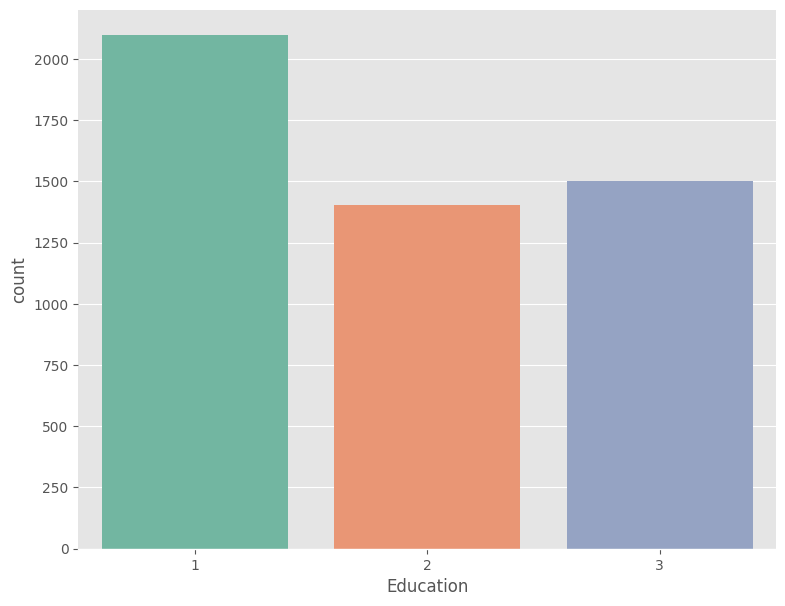

In [28]:
# to remove side line from graph

plt.figure(figsize=(9,7))
sns.countplot(data=df,x=df['Education'])
sns.despine(top=True,right=True,left=True)

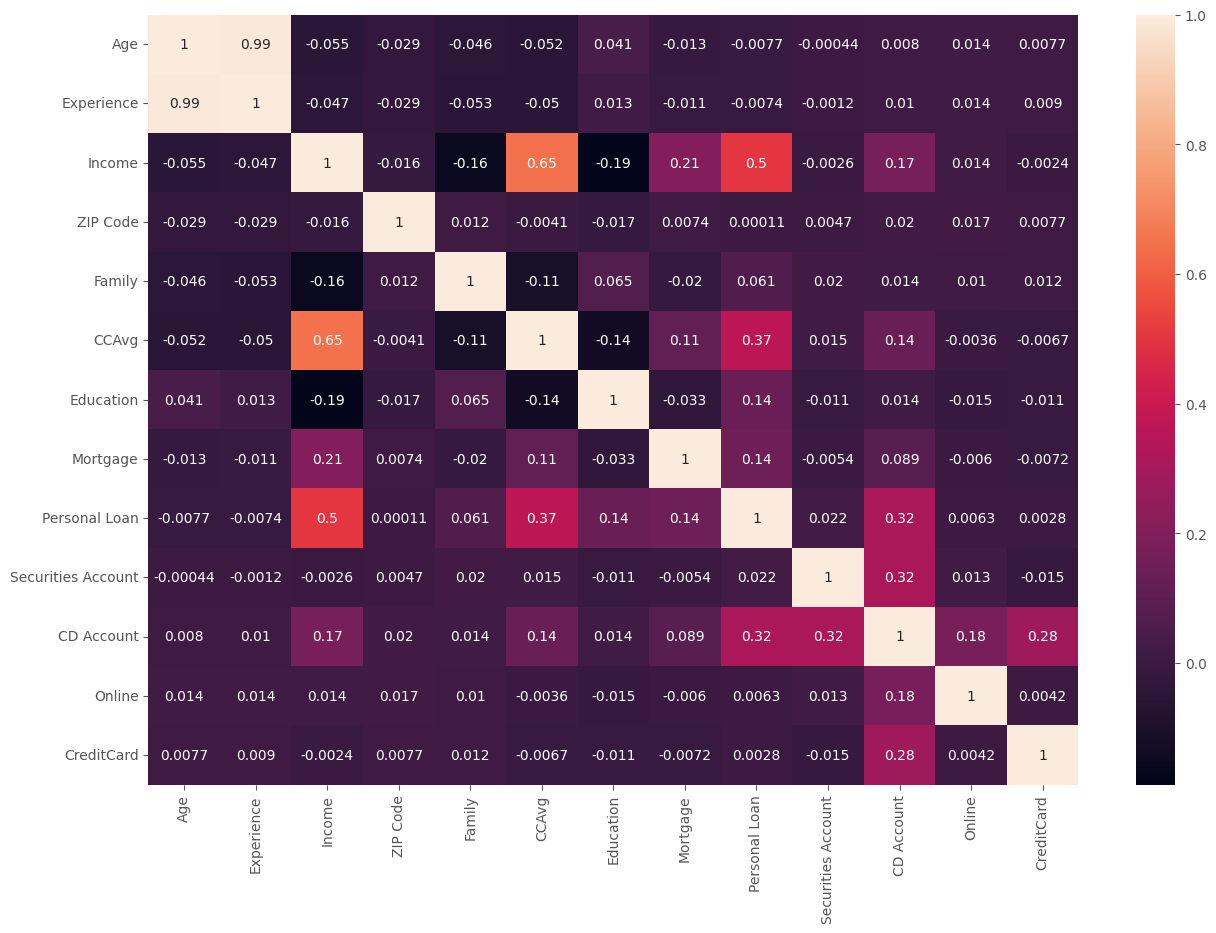

In [29]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

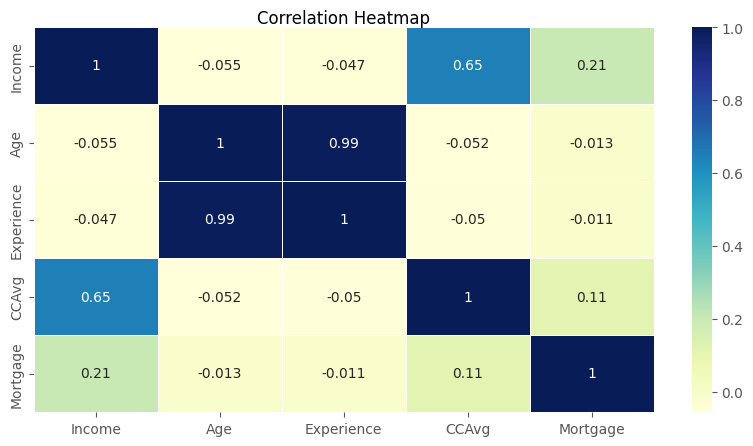

In [30]:
plt.figure(figsize=(10,5))
numerical=['Income','Age','Experience','CCAvg','Mortgage']

heatmap = sns.heatmap(df[numerical].corr(), annot=True, cmap='YlGnBu',linewidths=0.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=2);

In [31]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [32]:
# Saving dataset before treating outliers for logistic regression.
df_Decision = df.copy()

In [33]:
numeric_columns =['Income','CCAvg','Mortgage','Age']

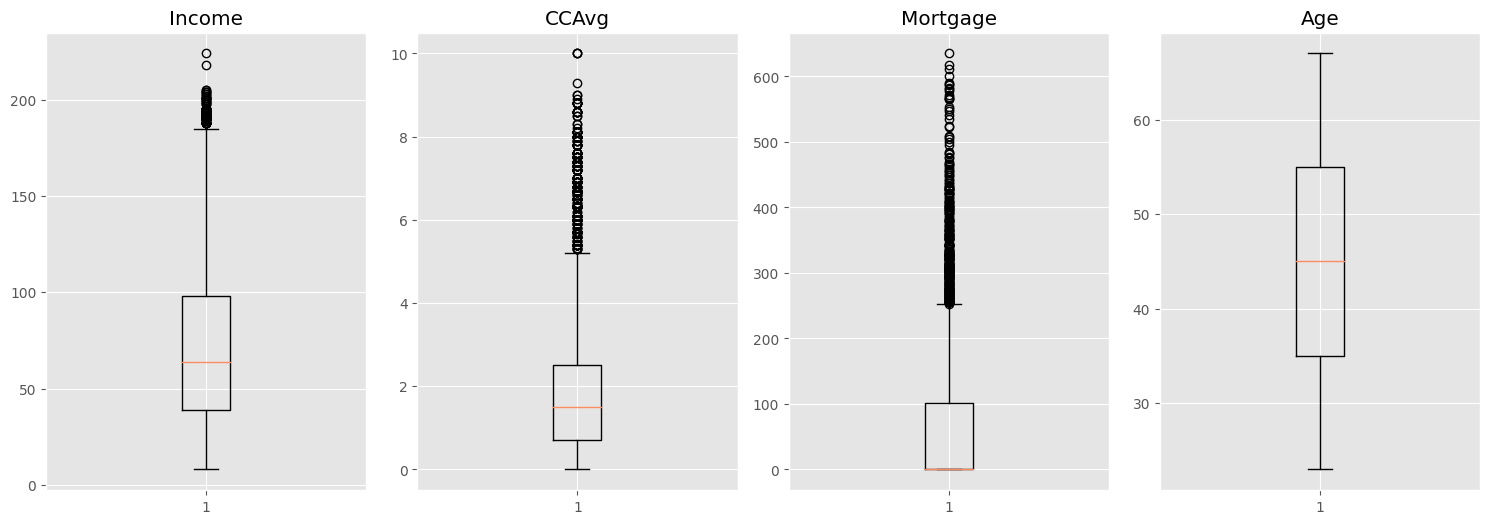

In [45]:
# outlier detection using boxplot
plt.figure(figsize=(15,20))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

**Logistic Regression**

In [36]:
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 1)

    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',colorbar=True,ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

In [51]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,statsklearn,threshold=0.5,flag=True,roc=False):

    # defining an empty list to store train and test results

    score_list=[]
    if statsklearn==0:
        pred_train = model.predict(X_train_df)
        pred_test = model.predict(X_test_df)
    else:
        pred_train = (model.predict(X_train_df)>threshold)
        pred_test = (model.predict(X_test_df)>threshold)


    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)

    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)

    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)

    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)

    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)


    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))

    if flag == True:
        print("\x1b[0;30;47m \033[1mMODEL PERFORMANCE\x1b[0m")
        print("\x1b[0;30;47m \033[1mAccuracy   : Train:\x1b[0m",
              round(accuracy_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(accuracy_score(y_test_pass,pred_test),3))
        print("\x1b[0;30;47m \033[1mRecall     : Train:\x1b[0m"
              ,round(recall_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m" ,
              round(recall_score(y_test_pass,pred_test),3))

        print("\x1b[0;30;47m \033[1mPrecision  : Train:\x1b[0m",
              round(precision_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(precision_score(y_test_pass,pred_test),3))
        print("\x1b[0;30;47m \033[1mF1         : Train:\x1b[0m",
              round(f1_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m",
              round(f1_score(y_test_pass,pred_test),3))
        make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")
        make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test")

    if roc == True:

        print("\x1b[0;30;47m \033[1mROC-AUC Score  :Train:\x1b[0m: ",
              round(roc_auc_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m: ",
              round(roc_auc_score(y_test_pass,pred_test),3))

    return score_list # returning the list with train and test scores

In [52]:
# # defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     '''Add scores to list so that we can compare all models score together'''
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])